In [1]:
%pylab inline
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [32]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)


# COM plot

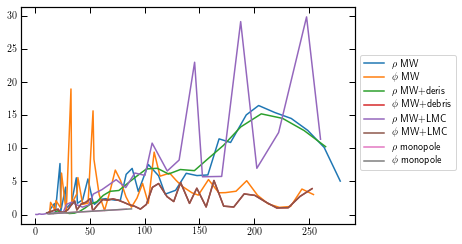

In [2]:
filenames = ["com_rho_mw5.txt", "com_pot_mw5.txt", "com_rho_mwdebris5.txt", "com_pot_mwdebris5.txt", 
            "com_rho_mwlmc5.txt", "com_pot_mwdebris5.txt", "com_rho_monopole5.txt", "com_pot_monopole5.txt"]
names = [r"$\rho$ MW", r"$\phi$ MW", r"$\rho$ MW+deris", r"$\phi$ MW+debris", 
        r"$\rho$ MW+LMC", r"$\phi$ MW+LMC", r"$\rho$ monopole", r"$\phi$ monopole"]


fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(names)):
    data = np.loadtxt(filenames[i])
    xcom = data[:,0]
    ycom = data[:,1]
    zcom = data[:,2]
    r = data[:,3]
    rcom = np.sqrt(xcom**2 + ycom**2 + zcom**2)
    ax.plot(r[3:], rcom[3:], label=names[i])
    ax.legend(ncol=1, bbox_to_anchor=(1, 0.8), fancybox=True)

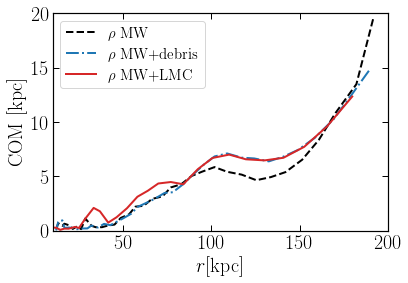

In [60]:
filenames = ["com_rho_mw_bfe.txt", "com_rho_mwlmcdebris_bfe.txt", "com_rho_mwlmc_bfe.txt"]
names = [r"$\rho$ MW", r"$\rho$ MW+debris", r"$\rho$ MW+LMC"]


lines = ['--', '-.', '-']
colors = ['k', 'C0', 'C3']
fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(names)):
    data = np.loadtxt(filenames[i])
    xcom = data[:,0]
    ycom = data[:,1]
    zcom = data[:,2]
    r = data[:,3]
    rcom = np.sqrt(xcom**2 + ycom**2 + zcom**2)
    ax.plot(r[2:], rcom[2:], label=names[i], c=colors[i], lw=2, ls=lines[i])
    ax.legend(ncol=1, fontsize=15)
ylim(0, 20)
xlim(10, 200)
xlabel('$r$[kpc]')
ylabel('COM [kpc]')
savefig('MW_COM_rho.pdf', bbox_inches='tight')

In [44]:
cm = matplotlib.cm.rainbow

42
47
41
46
33
46


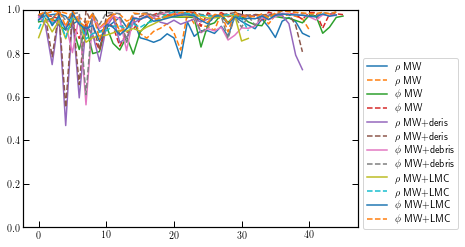

In [41]:
filenames = ["axis_ratios_rho_mwlmc5.txt", "axis_ratios_pot_mwlmc5.txt", "axis_ratios_rho_mw5.txt", 
            "axis_ratios_pot_mw5.txt", "axis_ratios_rho_mwdebris5.txt", "axis_ratios_pot_mwdebris5.txt"]
names = [r"$\rho$ MW", r"$\phi$ MW", r"$\rho$ MW+deris", r"$\phi$ MW+debris", 
        r"$\rho$ MW+LMC", r"$\phi$ MW+LMC"]

fig = plt.figure()
ax = plt.subplot(111)


for i in range(len(names)):
    data = np.loadtxt(filenames[i], dtype=str)
    print(len(data))
    s = np.zeros(len(data))
    q = np.zeros(len(data))
    for j in range(len(data)):
        s[j] = complex(data[j,0]).real
        q[j] = complex(data[j,1]).real
    ax.plot(s[::-1][:-1], label=names[i])
    ax.plot(q[::-1][:-1], label=names[i], ls='--')

    ax.set_ylim(0, 1)
    ax.legend(ncol=1, bbox_to_anchor=(1, 0.8), fancybox=True)

In [ ]:
# resolution test

In [3]:
data = np.loadtxt("axis_ratios_rho_mwlmc5.txt", dtype=str)


In [5]:
import pandas as pd

In [13]:
data = genfromtxt("axis_ratios_rho_mwlmc5.csv", dtype=str)

In [15]:
data[0]

array(['(2.876493172883426430e-01+0.000000000000000000e+00j)',
       '(3.854326475214159275e-01+0.000000000000000000e+00j)'],
      dtype='<U52')

In [30]:
complex(data[0][0])

(0.28764931728834264+0j)

In [46]:
import sys
sys.path.append("../")

In [48]:
import SCF_densities
import biff

In [94]:
path = "/home/xzk/work/github/MW-LMC-SCF/data/triaxial_halos/"
coeff_files = "bfe_spherical_rs12.7_coeff_sample_"
cov_files = "bfe_spherical_rs12.7_covmat_sample_"

s, t = SCF_densities.load_scf_coefficients(path+coeff_files, path+cov_files, 20, 20, 20, 0, 8, pmass=1e-4, sn=4)

0.0001


../coefficients_smoothing.py:124: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


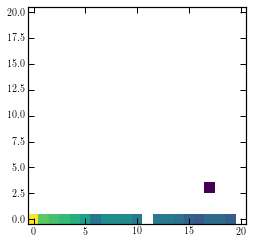

In [95]:
imshow(np.log10(np.abs(s[:,:,0].T)), origin='lower')

In [96]:
xgrid, ygrid = np.meshgrid(np.linspace(-300, 300, 100), np.linspace(-300, 300, 100))

In [104]:
rho = SCF_densities.scf_density( np.zeros(len(xgrid.flatten()))-30, xgrid.flatten(), ygrid.flatten(), s, t, 12)

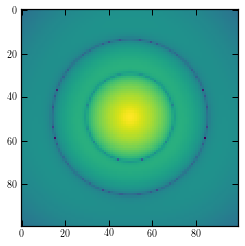

In [105]:
imshow(np.log10(np.abs(rho.reshape(100, 100))))